In [16]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl

# 正常显示画图时出现的中文和负号
mpl.rcParams['font.sans-serif'] = ['Arial Unicode Ms']
mpl.rcParams['axes.unicode_minus'] = False

# 设定要获取的台股股票代码
code = '0056.TW'  # 0056的代码

# 获取数据
def get_stock_data(code, start='2020-01-01', end=None):
    stock_data = yf.download(code, start=start, end=end, auto_adjust=True, progress=False)
    stock_data.reset_index(inplace=True)
    return stock_data

# 获取0056的日数据
tw = get_stock_data(code='0056.TW', start='2020-01-01')

# 查看数据的前5行
print(tw.head(5))

        Date       Open       High        Low      Close    Volume
0 2020-01-02  20.931650  21.018265  20.924432  20.996611  12542463
1 2020-01-03  21.039917  21.242016  20.960522  21.061571  15397477
2 2020-01-06  21.061567  21.061567  20.895558  20.902775  12664714
3 2020-01-07  20.895558  20.902775  20.556321  20.707895  28160121
4 2020-01-08  20.614063  20.707896  20.426400  20.570757  18148599


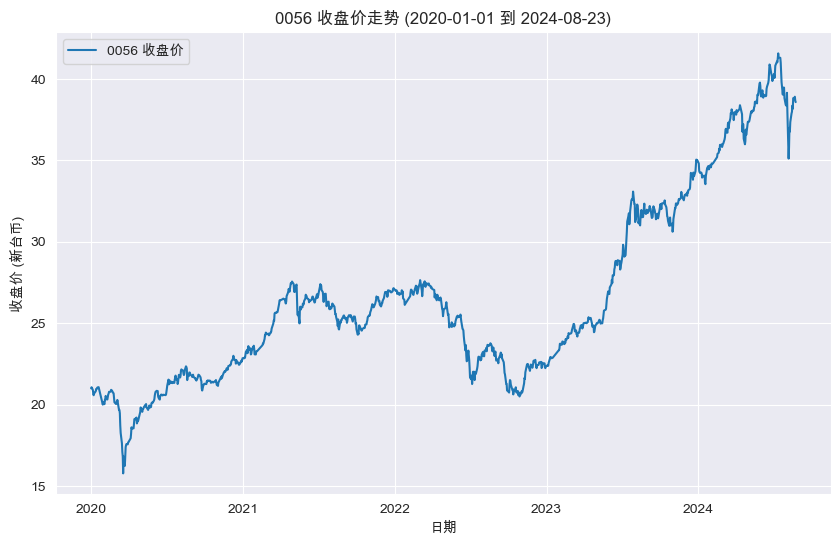

In [17]:

# 获取0056的日数据
tw = get_stock_data(code=code, start='2020-01-01', end='2024-08-23')

# 绘制收盘价折线图
plt.figure(figsize=(10, 6))
plt.plot(tw['Date'], tw['Close'], label='0056 收盘价')
plt.xlabel('日期')
plt.ylabel('收盘价 (新台币)')
plt.title('0056 收盘价走势 (2020-01-01 到 2024-08-23)')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
#pandas的describe()函数提供了数据的描述性统计
#count:数据样本，mean:均值，std:标准差
tw.describe().round()

,Date,Open,High,Low,Close,Volume
count,1129,1129.0,1129.0,1129.0,1129.0,1129.0
mean,2022-04-30 20:44:51.231177984,27.0,27.0,26.0,27.0,25776511.0
min,2020-01-02 00:00:00,16.0,16.0,15.0,16.0,0.0
25%,2021-03-08 00:00:00,22.0,22.0,22.0,22.0,11885847.0
50%,2022-05-04 00:00:00,25.0,25.0,25.0,25.0,18919693.0
75%,2023-06-30 00:00:00,29.0,29.0,29.0,29.0,29602729.0
max,2024-08-22 00:00:00,41.0,42.0,41.0,42.0,179173819.0
std,NaN,6.0,6.0,6.0,6.0,23236448.0


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


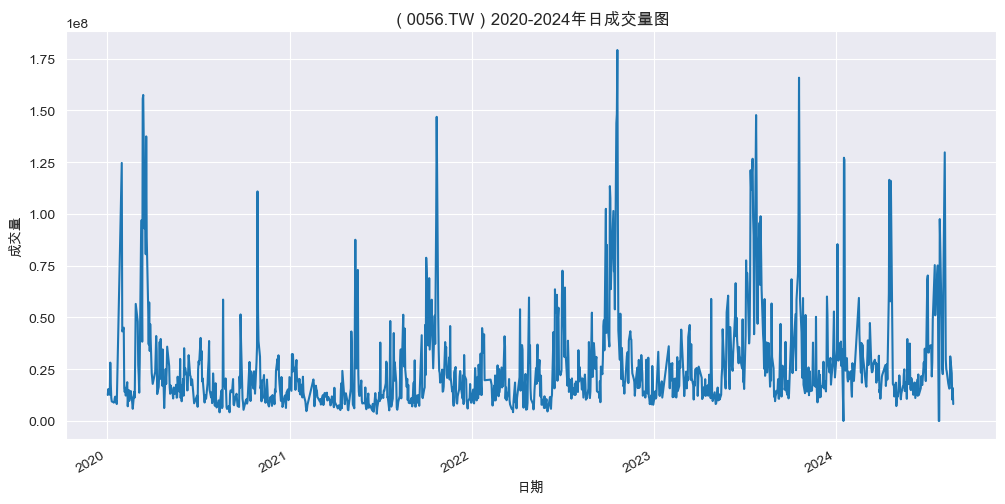

In [19]:
import yfinance as yf
import matplotlib.pyplot as plt
from pylab import mpl

# 设置中文字体和负号显示
mpl.rcParams['font.sans-serif'] = ['Arial Unicode Ms']
mpl.rcParams['axes.unicode_minus'] = False

# 设定要获取的台股股票代码
code = '0056.TW'  # 台积电的代码

# 获取数据
def get_stock_data(code, start='2020-01-01', end='2024-08-23'):
    stock_data = yf.download(code, start=start, end=end, auto_adjust=True, progress=False)
    stock_data.reset_index(inplace=True)
    return stock_data

# 获取0056的日数据
tw = get_stock_data(code='0056.TW', start='2020-01-01')

# 检查 DataFrame 列名
print(tw.columns)

# 绘制成交量走势图
if 'Volume' in tw.columns:
    tw.set_index('Date', inplace=True)  # 设置日期为索引
    tw['Volume'].plot(figsize=(12, 6))
    plt.title('（0056.TW）2020-2024年日成交量图')
    plt.xlabel('日期')
    plt.ylabel('成交量')
    plt.show()
else:
    print("DataFrame 中不存在 'Volume' 列，请检查列名。")

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


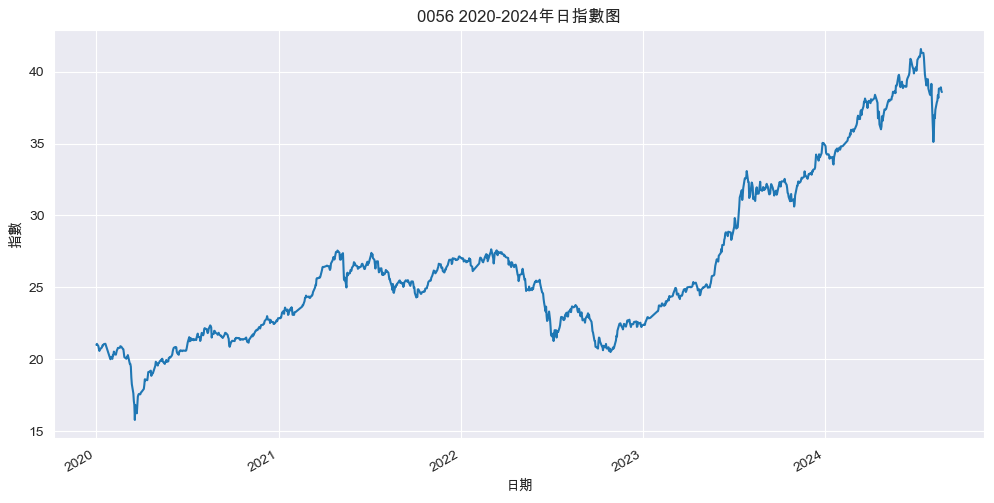

In [20]:
# 设置中文字体和负号显示
mpl.rcParams['font.sans-serif'] = ['Arial Unicode Ms']
mpl.rcParams['axes.unicode_minus'] = False

# 设定要获取的台股股票代码
code = '0056.TW'  # 0056的代码

# 获取数据
def get_stock_data(code, start='2020-01-01', end='2024-08-23'):
    stock_data = yf.download(code, start=start, end=end, auto_adjust=True, progress=False)
    stock_data.reset_index(inplace=True)
    return stock_data

# 获取台积电的日数据
tw = get_stock_data(code='0056.TW', start='2020-01-01')

# 检查 DataFrame 列名
print(tw.columns)

# 绘制成交量走势图
if ('Volume' in tw.columns):
    tw.set_index('Date', inplace=True)  # 设置日期为索引
    tw['Close'].plot(figsize=(12, 6))
    plt.title('0056 2020-2024年日指數图')
    plt.xlabel('日期')
    plt.ylabel('指數')
    plt.show()
else:
    print("DataFrame 中不存在 'Volume' 列，请检查列名。")

In [21]:
#这里的平均线是通过自定义函数，手动设置20,52,252日均线
#移动平均线：
ma_day = [20,52,252]

for ma in ma_day:
    column_name = "%s日均线" %(str(ma))
    tw[column_name] =tw["Close"].rolling(ma).mean()
tw.tail(3)

,Open,High,Low,Close,Volume,20日均线,52日均线,252日均线
Date,,,,,,,,
2024-08-20,38.849998,39.040001,38.849998,38.910000,10319550,38.0525,39.433391,35.592958
2024-08-21,38.869999,38.869999,38.590000,38.660000,15894209,38.0120,39.426861,35.622340
2024-08-22,38.669998,38.799999,38.549999,38.580002,8149166,37.9675,39.419916,35.652410


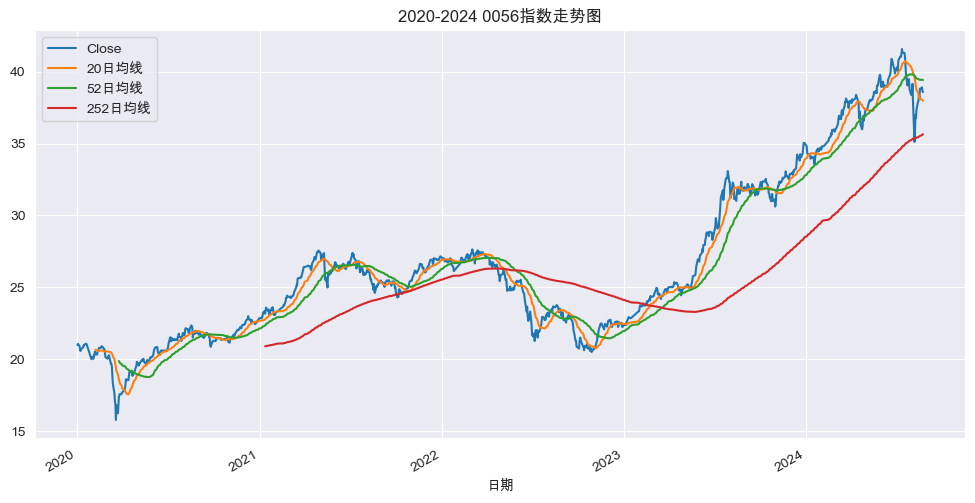

In [22]:
#画出2010年以来收盘价和均线图
tw.loc['2020-01-01':][["Close","20日均线","52日均线","252日均线"]].plot(figsize=(12,6))
plt.title('2020-2024 0056指数走势图')
plt.xlabel('日期')
plt.show()

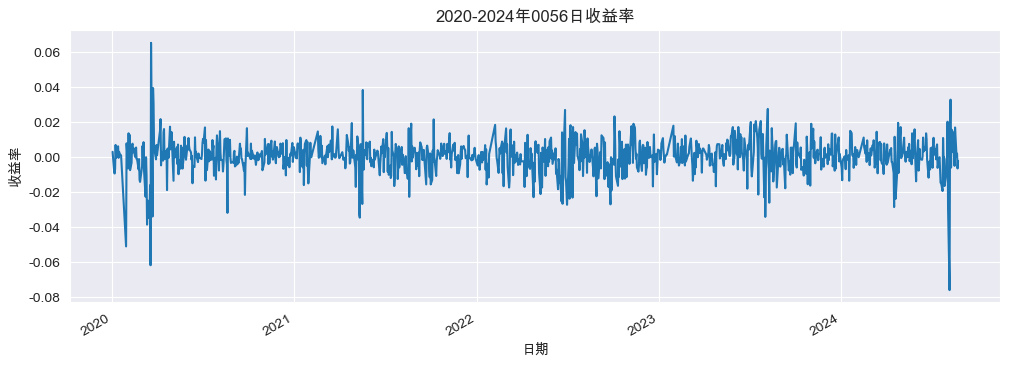

In [23]:
#2005年之前的数据噪音太大，主要分析2005年之后的
tw["日收益率"] = tw["Close"].pct_change()
tw["日收益率"].loc['2020-01-01':].plot(figsize=(12,4))
plt.xlabel('日期')
plt.ylabel('收益率')
plt.title('2020-2024年0056日收益率')
plt.show()

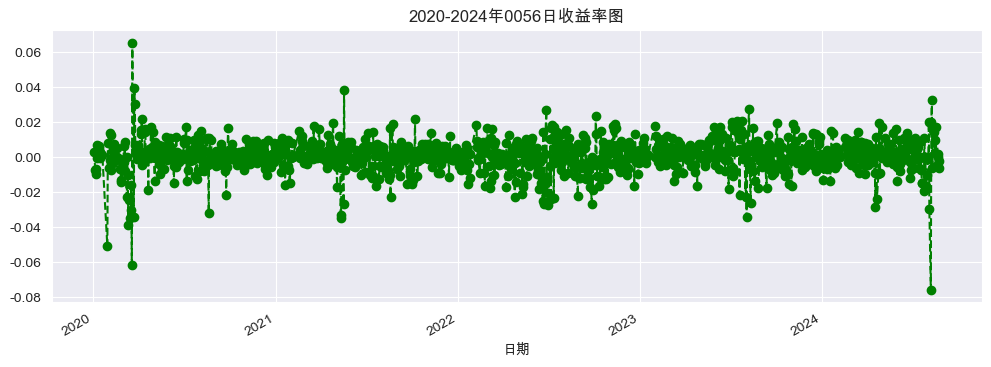

In [24]:
###这里我们改变一下线条的类型(linestyle)以及加一些标记(marker)
tw["日收益率"].loc['2020-01-01':].plot(figsize=(12,4),linestyle="--",marker="o",color="g")
plt.title('2020-2024年0056日收益率图')
plt.xlabel('日期')
plt.show()

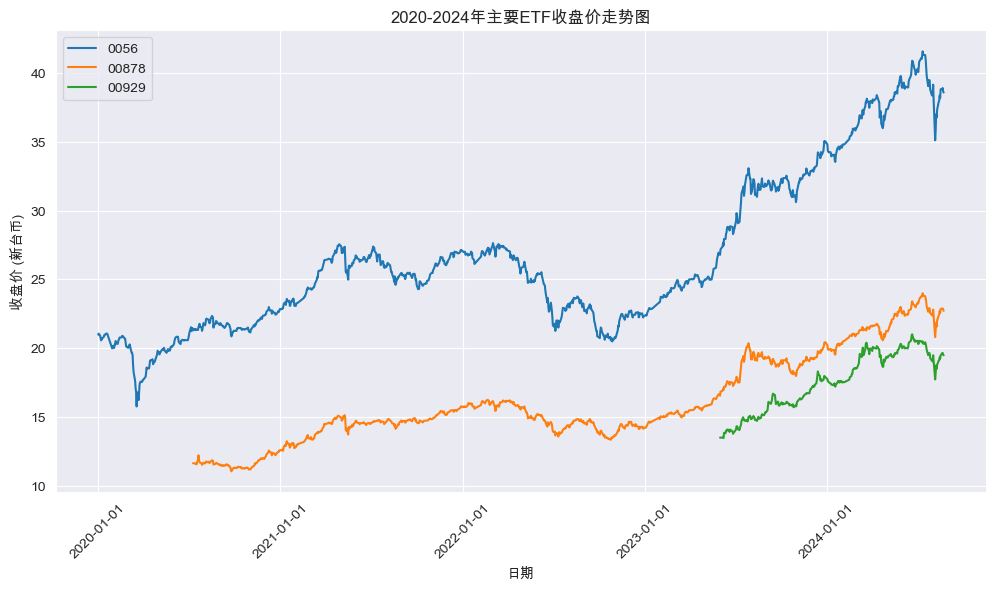

                 0056      00878      00929
Date                                       
2024-08-16  38.820000  22.860001  19.481453
2024-08-19  38.830002  22.879999  19.639999
2024-08-20  38.910000  22.889999  19.660000
2024-08-21  38.660000  22.809999  19.530001
2024-08-22  38.580002  22.719999  19.490000


In [25]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from pylab import mpl

# 正常显示画图时出现的中文和负号
mpl.rcParams['font.sans-serif'] = ['Arial Unicode Ms']
mpl.rcParams['axes.unicode_minus'] = False

# 设定要获取的台股股票代码
stocks = {
    '0056': '0056.TW',
    '00878': '00878.TW',
    '00929': '00929.TW',
}

# 创建一个空的DataFrame用于存储所有股票的收盘价
stock_index = pd.DataFrame()

# 获取每个股票的数据，并存储到DataFrame中
for name, code in stocks.items():
    data = get_stock_data(code)
    stock_index[name] = data.set_index('Date')['Close']

# 绘制股票指数走势图
plt.figure(figsize=(12, 6))
for stock in stock_index.columns:
    plt.plot(stock_index.index, stock_index[stock], label=stock)

plt.title('2020-2024年主要ETF收盘价走势图')
plt.xlabel('日期')
plt.ylabel('收盘价 (新台币)')
plt.legend()
plt.grid(True)

# 设置X轴日期格式
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())

plt.xticks(rotation=45)  # 旋转日期标签以避免重叠
plt.show()

# 查看数据的前几行
print(stock_index.tail())

In [26]:
#计算这些股票指数每日涨跌幅
tech_rets = stock_index.pct_change()[1:]
tech_rets.tail()

,0056,00878,00929
Date,,,
2024-08-16,0.017029,0.012400,0.012358
2024-08-19,0.000258,0.000875,0.008138
2024-08-20,0.002060,0.000437,0.001018
2024-08-21,-0.006425,-0.003495,-0.006612
2024-08-22,-0.002069,-0.003946,-0.002048


In [27]:
#收益率描述性统计
tech_rets.describe()

,0056,00878,00929
count,1128.000000,1005.000000,301.000000
mean,0.000587,0.000700,0.001270
std,0.009743,0.008346,0.010068
min,-0.076053,-0.067774,-0.069163
25%,-0.003482,-0.003432,-0.003814
50%,0.000934,0.001087,0.000628
75%,0.005700,0.005123,0.006646
max,0.065446,0.038886,0.031046


In [28]:
#均值其实都大于0
import seaborn as sns    
tech_rets.mean()*100 #转换为%

0056     0.058717
00878    0.069998
00929    0.126976
dtype: float64

/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_38299/2470406705.py:29: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['00878_ret'] = data['00878'].pct_change()
/var/folders/_z/wf028lv51rl4_zw8pxj4k3740000gn/T/ipykernel_38299/2470406705.py:31: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  data['00929_ret'] = data['00929'].pct_change()


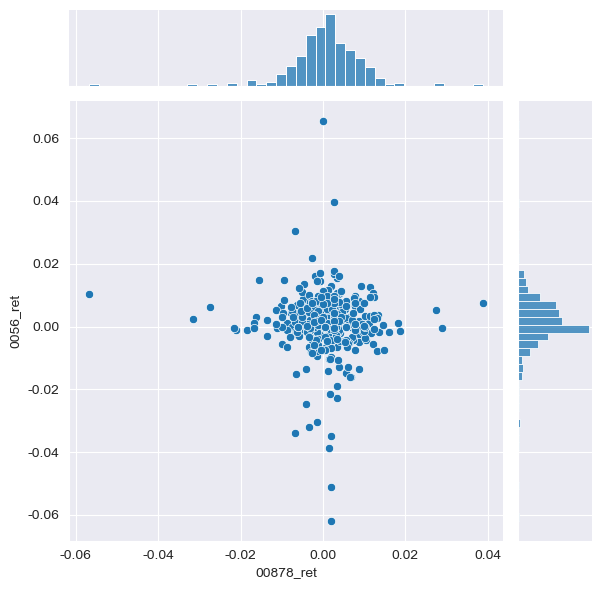

In [29]:
import seaborn as sns
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch data for TSMC and another stock (e.g., '0056.TW')
def get_new_stock_data(code, start='2020-01-01', end='2024-08-23'):
    stock_data = yf.download(code, start=start, end=end, auto_adjust=True, progress=False)
    stock_data.reset_index(inplace=True)
    return stock_data

# Fetch data for both stocks
ETF_00878_data = get_new_stock_data('00878.TW')
ETF_0056_data = get_new_stock_data('0056.TW')
ETF_00929_data = get_new_stock_data('00929.TW')

# Combine the data into a single DataFrame
data = pd.DataFrame({
    '00878': ETF_00878_data['Close'],
    '0056': ETF_0056_data['Close'],
    '00929': ETF_00929_data['Close'],
    'Date': ETF_0056_data['Date']
})

# Ensure that 'Date' is the index
data.set_index('Date', inplace=True)

# Calculate daily returns
data['00878_ret'] = data['00878'].pct_change()
data['0056_ret'] = data['0056'].pct_change()
data['00929_ret'] = data['00929'].pct_change()

# Drop NaN values
data.dropna(inplace=True)

# Plot the jointplot for 00878 and 0056 returns
sns.jointplot(x='00878_ret', y='0056_ret', data=data, kind='scatter')

# Show the plot
plt.show()

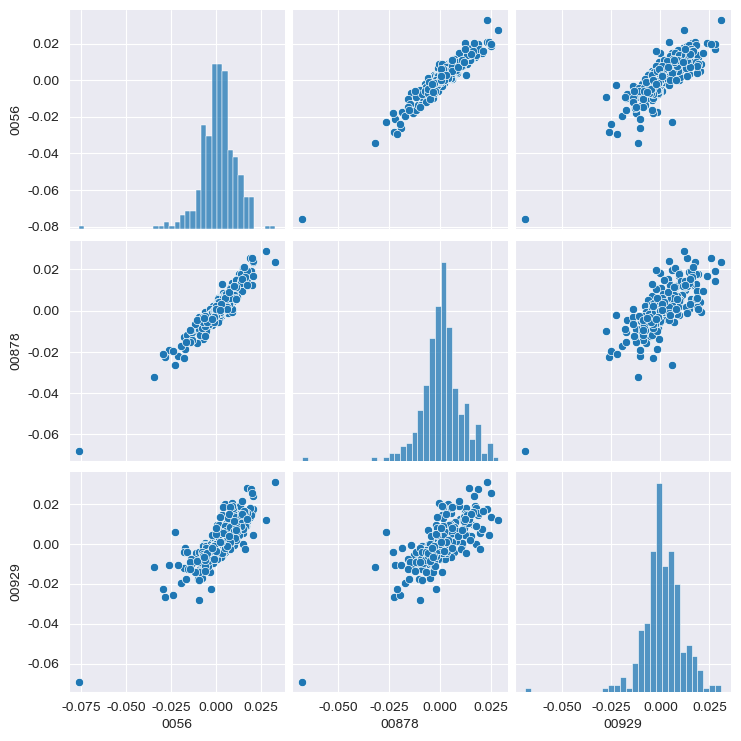

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# 假设 tech_rets 是你已计算出的各个股票的收益率 DataFrame
# 并且它的前几列是日期或者其他无关的列
# 这里你想要从第4列开始比较
sns.pairplot(tech_rets.iloc[:, :].dropna())

# Show the plot
plt.show()

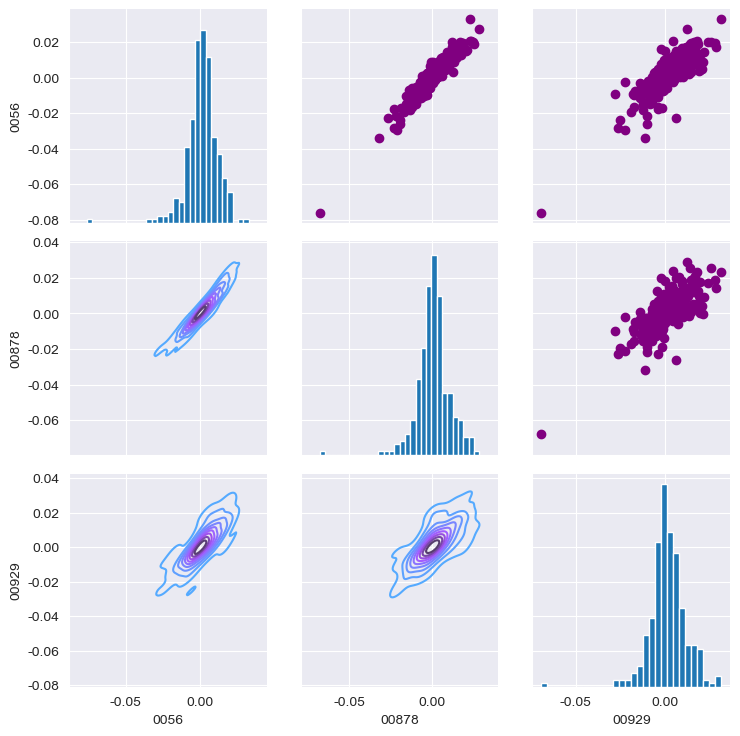

In [31]:
returns_fig = sns.PairGrid(tech_rets.iloc[:,:].dropna())
  
###右上角画散点图
returns_fig.map_upper(plt.scatter,color="purple") 
 
###左下角画核密度图 
returns_fig.map_lower(sns.kdeplot,cmap="cool_d") 
 
###对角线的直方图 
returns_fig.map_diag(plt.hist,bins=30)

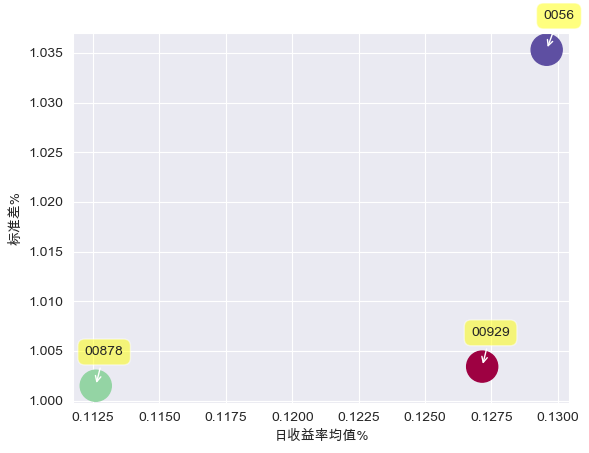

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# 构建一个计算股票收益率和标准差的函数
def return_risk(stocks, startdate='2020-01-01'):
    close = pd.DataFrame()
    for code in stocks.values():
        # 获取股票的收盘价数据
        stock_data = yf.download(code, start=startdate, auto_adjust=True, progress=False)
        close[code] = stock_data['Close']
    tech_rets = close.pct_change()[1:]  # 计算每日涨跌幅
    rets = tech_rets.dropna()  # 去掉NaN数据
    ret_mean = rets.mean() * 100  # 计算平均收益率
    ret_std = rets.std() * 100  # 计算标准差
    return ret_mean, ret_std

# 画图函数
def plot_return_risk():
    ret, vol = return_risk(stocks)
    color = np.array([0.18, 0.96, 0.75])  # 调整颜色数组的长度
    plt.scatter(ret, vol, marker='o', c=color, s=500, cmap=plt.get_cmap('Spectral'))
    plt.xlabel("日收益率均值%")
    plt.ylabel("标准差%")
    for label, x, y in zip(stocks.keys(), ret, vol):
        plt.annotate(label, xy=(x, y), xytext=(20, 20),
                     textcoords="offset points", ha="right", va="bottom",
                     bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                     arrowprops=dict(arrowstyle="->",
                                     connectionstyle="arc3,rad=0"))

# 设定要获取的台股股票代码
stocks = {
    '00929': '00929.TW',
    '0056': '0056.TW',
    '00878': '00878.TW',
}

plot_return_risk()
plt.show()

### 蒙特卡洛模拟分析

蒙特卡洛模拟是一种统计学方法，用来模拟数据的演变趋势。蒙特卡洛模拟是在二战期间，当时在原子弹研制的项目中，为了模拟裂变物质的中子随机扩散现象，由美国数学家冯·诺伊曼和乌拉姆等发明的一种统计方法。之所以起名叫蒙特卡洛模拟，是因为蒙特卡洛在是欧洲袖珍国家摩纳哥一个城市，这个城市在当时是非常著名的一个赌城。因为赌博的本质是算概率，而蒙特卡洛模拟正是以概率为基础的一种方法，所以用赌城的名字为这种方法命名。蒙特卡洛模拟每次输入都随机选择输入值，通过大量的模拟次数，最终得出一个累计概率分布图。

In [33]:
# 使用yfinance获取股票数据
import yfinance as yf
import pandas as pd

def get_stock_data_yf(ticker, start='2020-01-01'):
    df = yf.download(ticker, start=start, auto_adjust=True, progress=False)
    return df

# 获取上证指数数据，类似于 'sh' 在 ts.get_k_data 中
df_00929 = get_stock_data_yf('00929.TW', start='2020-01-01')
df_00878 = get_stock_data_yf('00878.TW', start='2020-01-01')
df_0056 = get_stock_data_yf('0056.TW', start='2020-01-01')

# 将日期设为索引
df_00929.index = pd.to_datetime(df_00929.index)
df_0056.index = pd.to_datetime(df_0056.index)
df_00878.index = pd.to_datetime(df_00878.index)

# 计算每日涨跌幅
tech_rets_0056 = df_0056['Close'].pct_change()[1:].dropna()
tech_rets_00878 = df_00878['Close'].pct_change()[1:].dropna()
tech_rets_00929 = df_00929['Close'].pct_change()[1:].dropna()

# 查看前几行数据
print('0056',tech_rets_0056.tail())
print('00878',tech_rets_00878.tail())
print('00929',tech_rets_00929.tail())

0056 Date
2024-08-20    0.002060
2024-08-21   -0.006425
2024-08-22   -0.002069
2024-08-23    0.000778
2024-08-26    0.010619
Name: Close, dtype: float64
00878 Date
2024-08-20    0.000437
2024-08-21   -0.003495
2024-08-22   -0.003946
2024-08-23    0.001761
2024-08-26    0.007469
Name: Close, dtype: float64
00929 Date
2024-08-20    0.001018
2024-08-21   -0.006612
2024-08-22   -0.002048
2024-08-23    0.001539
2024-08-26    0.001537
Name: Close, dtype: float64


In [34]:
# 计算1%分位数，以表示99%置信下的最大损失
quantile_99_00878 = tech_rets_00878.quantile(0.01)
print(f"99%置信下的最大损失: {quantile_99_00878}")


99%置信下的最大损失: -0.021146554311651418


In [35]:
# 计算1%分位数，以表示99%置信下的最大损失
quantile_99_00929 = tech_rets_00929.quantile(0.01)
print(f"99%置信下的最大损失: {quantile_99_00929}")



99%置信下的最大损失: -0.025397290751780564


In [36]:
# 计算1%分位数，以表示99%置信下的最大损失
quantile_99_0056 = tech_rets_0056.quantile(0.01)
print(f"99%置信下的最大损失: {quantile_99_0056}")


99%置信下的最大损失: -0.029126782664715238


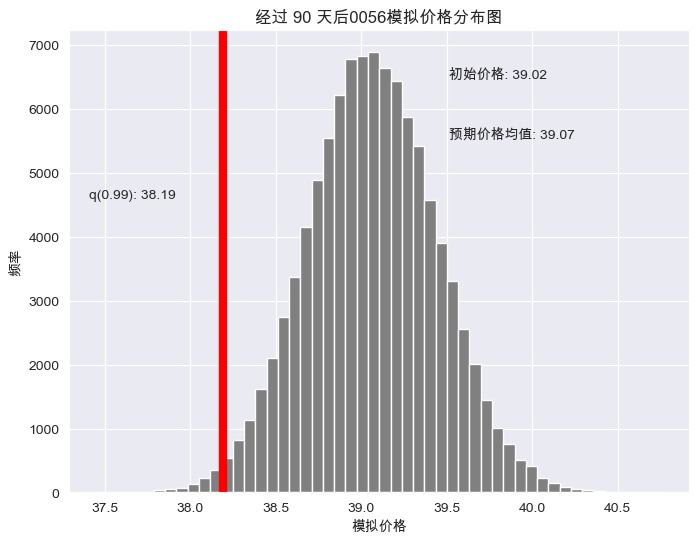

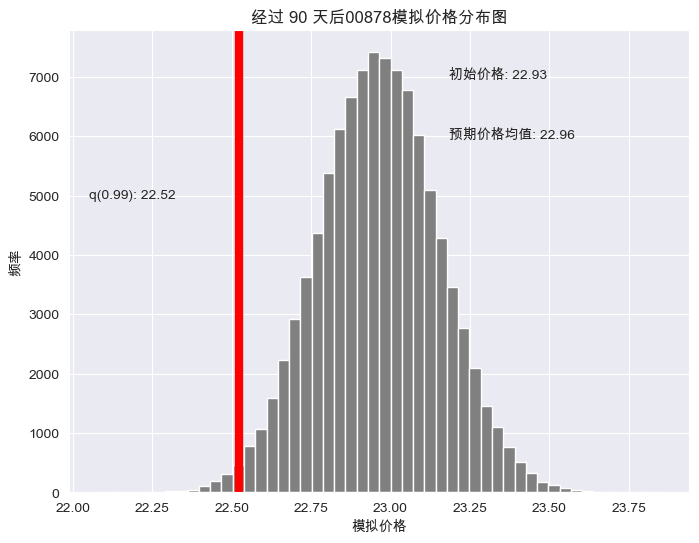

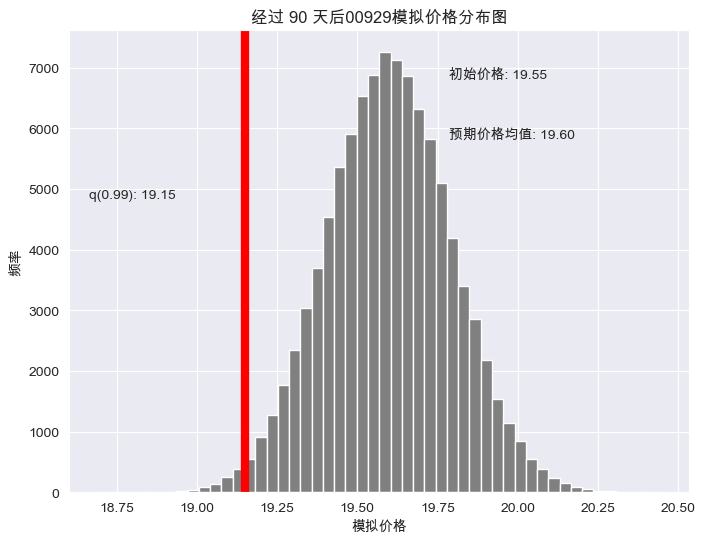

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd

# 使用yfinance获取股票数据
def get_stock_data_yf(ticker, start='2020-01-01'):
    df = yf.download(ticker, start=start, auto_adjust=True, progress=False)
    return df

# 蒙特卡洛模拟函数
def monte_carlo(start_price, days, mu, sigma):
    dt = 1 / days
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

# 模拟函数
def run_simulation(rets, start_price, days, runs):
    mu = rets.mean()
    sigma = rets.std()
    simulations = np.zeros(runs)
    
    for run in range(runs):
        simulations[run] = monte_carlo(start_price, days, mu, sigma)[days-1]
    
    return simulations

# 获取最近一天的收盘价
def get_last_close_price(df):
    return df['Close'].iloc[-1]

# 参数
runs = 100000
days = 90

# 获取ETF数据
df_0056 = get_stock_data_yf('0056.TW', start='2020-01-01')
df_00878 = get_stock_data_yf('00878.TW', start='2020-01-01')
df_00929 = get_stock_data_yf('00929.TW', start='2020-01-01')

# 获取最新的收盘价
start_price_0056 = get_last_close_price(df_0056)
start_price_00878 = get_last_close_price(df_00878)
start_price_00929 = get_last_close_price(df_00929)

# 计算每日涨跌幅
tech_rets_0056 = df_0056['Close'].pct_change().dropna()
tech_rets_00878 = df_00878['Close'].pct_change().dropna()
tech_rets_00929 = df_00929['Close'].pct_change().dropna()

# 进行模拟
simulations_0056 = run_simulation(tech_rets_0056, start_price_0056, days, runs)
simulations_00878 = run_simulation(tech_rets_00878, start_price_00878, days, runs)
simulations_00929 = run_simulation(tech_rets_00929, start_price_00929, days, runs)

# 绘制结果
def plot_simulation(simulations, start_price, days, label):
    q = np.percentile(simulations, 1)
    plt.figure(figsize=(8,6))
    plt.hist(simulations, bins=50, color='grey')
    plt.figtext(0.6, 0.8, "初始价格: %.2f" % start_price)
    plt.figtext(0.6, 0.7, "预期价格均值: %.2f" % simulations.mean())
    plt.figtext(0.15, 0.6, "q(0.99): %.2f" % q)
    plt.axvline(x=q, linewidth=6, color="r")
    plt.title(f"经过 {days} 天后{label}模拟价格分布图", weight="bold")
    plt.xlabel("模拟价格")
    plt.ylabel("频率")
    plt.show()

# 绘制每个ETF的模拟结果
plot_simulation(simulations_0056, start_price_0056, days, '0056')
plot_simulation(simulations_00878, start_price_00878, days, '00878')
plot_simulation(simulations_00929, start_price_00929, days, '00929')

实际上蒙特卡洛模拟在期权定价里面还是很有用的。我们借用期权定价里对未来股票走势的假定来进行蒙特卡洛模拟。

In [47]:
import numpy as np
import yfinance as yf
from time import time

# 使用yfinance获取股票数据
def get_stock_data_yf(ticker, start='2020-01-01'):
    df = yf.download(ticker, start=start, auto_adjust=True, progress=False)
    return df

# 获取最近一天的收盘价
def get_last_close_price(df):
    return df['Close'].iloc[-1]

# 设定种子和参数
np.random.seed(2020)
T = 1.0
r = 0.05
M = 500
dt = T / M
I = 5000000

# 获取ETF数据
df_0056 = get_stock_data_yf('0056.TW', start='2020-01-01')
df_00878 = get_stock_data_yf('00878.TW', start='2020-01-01')
df_00929 = get_stock_data_yf('00929.TW', start='2020-01-01')

# 获取最新的收盘价
S0_0056 = get_last_close_price(df_0056)
S0_00878 = get_last_close_price(df_00878)
S0_00929 = get_last_close_price(df_00929)

# 计算每日涨跌幅
rets_0056 = df_0056['Close'].pct_change().dropna()
rets_00878 = df_00878['Close'].pct_change().dropna()
rets_00929 = df_00929['Close'].pct_change().dropna()

# 蒙特卡洛模拟
def monte_carlo_simulation(S0, sigma, M, dt, I):
    S = np.zeros((M + 1, I))
    S[0] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return S[-1].mean()

# 计算每个ETF的预期平均收盘价
t0 = time()
s_m_0056 = monte_carlo_simulation(S0_0056, rets_0056.std(), M, dt, I)
s_m_00878 = monte_carlo_simulation(S0_00878, rets_00878.std(), M, dt, I)
s_m_00929 = monte_carlo_simulation(S0_00929, rets_00929.std(), M, dt, I)
tnp1 = time() - t0

print(f'经过{I}次模拟，得出1年以后0056的预期平均收盘价为：{s_m_0056:.2f}')
print(f'经过{I}次模拟，得出1年以后00878的预期平均收盘价为：{s_m_00878:.2f}')
print(f'经过{I}次模拟，得出1年以后00929的预期平均收盘价为：{s_m_00929:.2f}')
print(f'模拟总时长：{tnp1:.2f}秒')

经过5000000次模拟，得出1年以后0056的预期平均收盘价为：41.02
经过5000000次模拟，得出1年以后00878的预期平均收盘价为：24.11
经过5000000次模拟，得出1年以后00929的预期平均收盘价为：20.55
模拟总时长：170.71秒


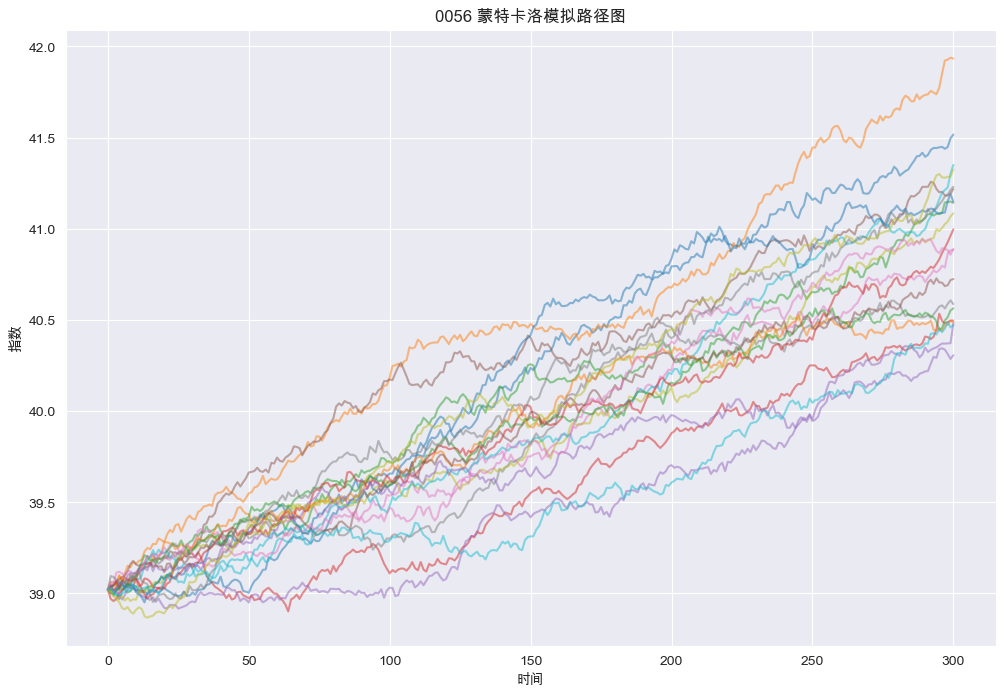

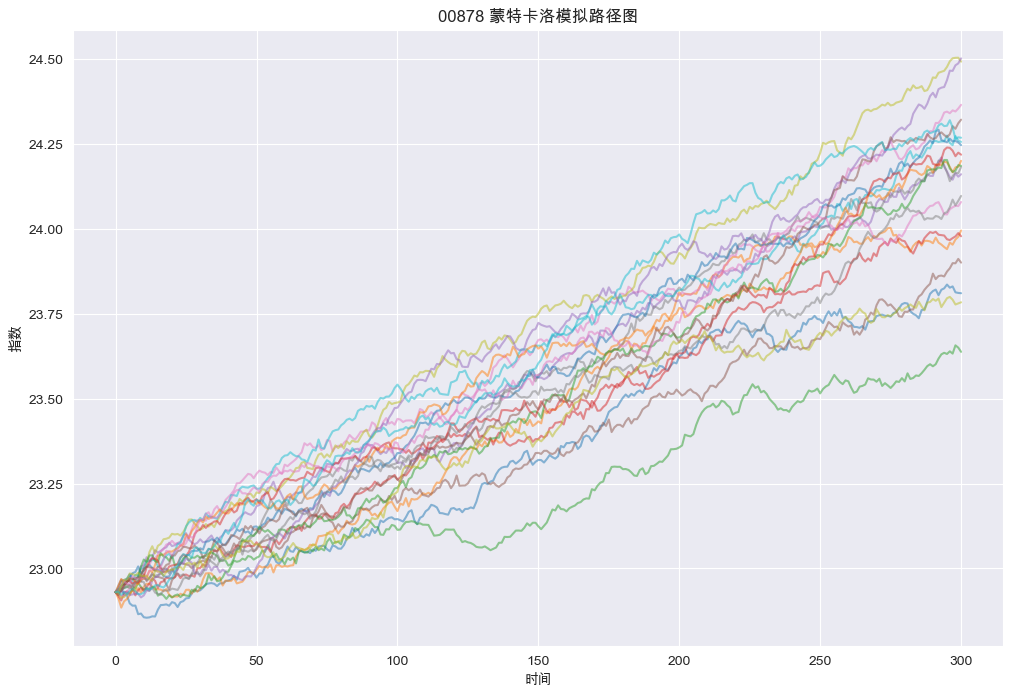

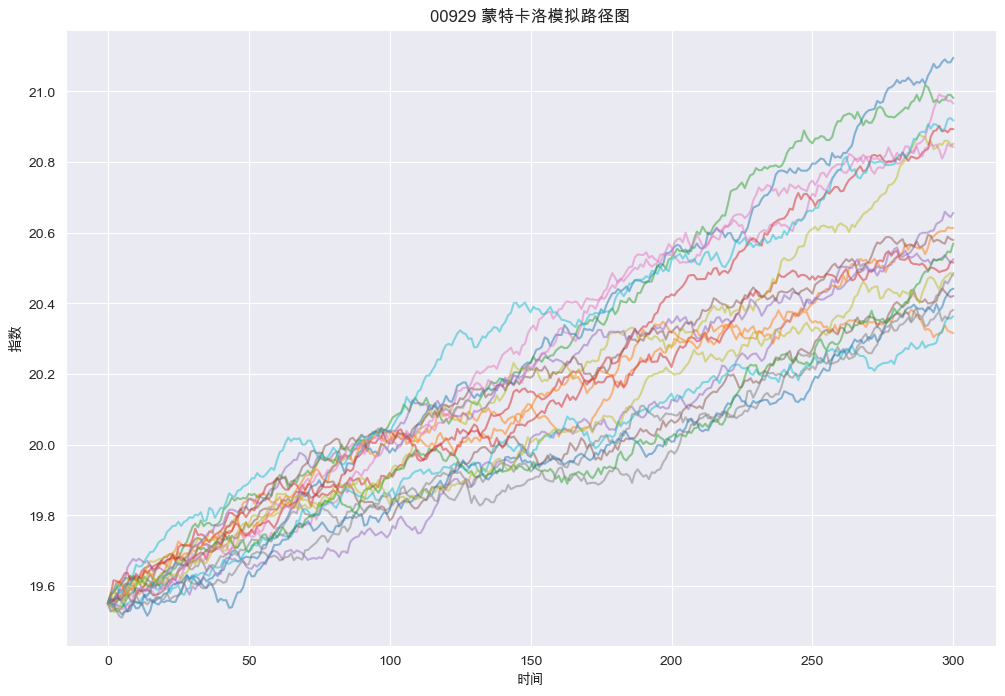

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# 使用yfinance获取股票数据
def get_stock_data_yf(ticker, start='2020-01-01'):
    df = yf.download(ticker, start=start, auto_adjust=True, progress=False)
    return df

# 获取最近一天的收盘价
def get_last_close_price(df):
    return df['Close'].iloc[-1]

# 计算每日涨跌幅
def get_returns(df):
    return df['Close'].pct_change().dropna()

# 蒙特卡洛模拟
def monte_carlo_simulation_paths(S0, sigma, M, dt, I, num_paths):
    S = np.zeros((M + 1, I))
    S[0] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return S[:, :num_paths]

# 参数
T = 1.0
r = 0.05
M = 300
dt = T / M
I = 2500000
num_paths = 20

# 获取ETF数据
df_0056 = get_stock_data_yf('0056.TW', start='2020-01-01')
df_00878 = get_stock_data_yf('00878.TW', start='2020-01-01')
df_00929 = get_stock_data_yf('00929.TW', start='2020-01-01')

# 获取最新的收盘价
S0_0056 = get_last_close_price(df_0056)
S0_00878 = get_last_close_price(df_00878)
S0_00929 = get_last_close_price(df_00929)

# 计算每日涨跌幅
rets_0056 = get_returns(df_0056)
rets_00878 = get_returns(df_00878)
rets_00929 = get_returns(df_00929)

# 进行蒙特卡洛模拟
paths_0056 = monte_carlo_simulation_paths(S0_0056, rets_0056.std(), M, dt, I, num_paths)
paths_00878 = monte_carlo_simulation_paths(S0_00878, rets_00878.std(), M, dt, I, num_paths)
paths_00929 = monte_carlo_simulation_paths(S0_00929, rets_00929.std(), M, dt, I, num_paths)

# 绘制结果
def plot_simulation_paths(paths, label):
    plt.figure(figsize=(12, 8))
    plt.plot(paths, alpha=0.5)
    plt.title(f'{label} 蒙特卡洛模拟路径图')
    plt.xlabel('时间')
    plt.ylabel('指数')
    plt.grid(True)
    plt.show()

# 绘制每个ETF的模拟路径图
plot_simulation_paths(paths_0056, '0056')
plot_simulation_paths(paths_00878, '00878')
plot_simulation_paths(paths_00929, '00929')

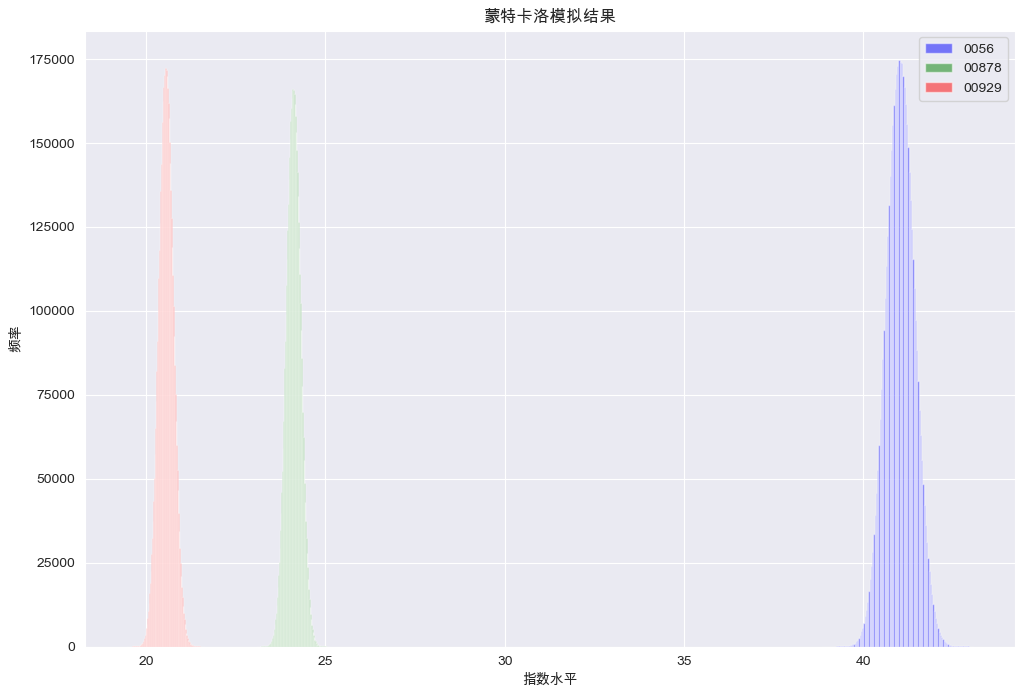

模拟总时长：170.71秒


In [50]:
# 使用yfinance获取股票数据
def get_stock_data_yf(ticker, start='2020-01-01'):
    df = yf.download(ticker, start=start, auto_adjust=True, progress=False)
    return df

# 获取最近一天的收盘价
def get_last_close_price(df):
    return df['Close'].iloc[-1]

# 计算每日涨跌幅
def get_returns(df):
    return df['Close'].pct_change().dropna()

# 蒙特卡洛模拟
def monte_carlo_simulation(S0, sigma, M, dt, I):
    S = np.zeros((M + 1, I))
    S[0] = S0
    for t in range(1, M + 1):
        z = np.random.standard_normal(I)
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)
    return S[-1]
T = 1.0
r = 0.05
M = 100
dt = T / M
I = 5000000

# 获取ETF数据
df_0056 = get_stock_data_yf('0056.TW', start='2020-01-01')
df_00878 = get_stock_data_yf('00878.TW', start='2020-01-01')
df_00929 = get_stock_data_yf('00929.TW', start='2020-01-01')

# 获取最新的收盘价
S0_0056 = get_last_close_price(df_0056)
S0_00878 = get_last_close_price(df_00878)
S0_00929 = get_last_close_price(df_00929)

# 计算每日涨跌幅
rets_0056 = get_returns(df_0056)
rets_00878 = get_returns(df_00878)
rets_00929 = get_returns(df_00929)

# 进行蒙特卡洛模拟
final_prices_0056 = monte_carlo_simulation(S0_0056, rets_0056.std(), M, dt, I)
final_prices_00878 = monte_carlo_simulation(S0_00878, rets_00878.std(), M, dt, I)
final_prices_00929 = monte_carlo_simulation(S0_00929, rets_00929.std(), M, dt, I)

# 绘制结果
plt.figure(figsize=(12, 8))

plt.hist(final_prices_0056, bins=120, alpha=0.5, label='0056', color='blue')
plt.hist(final_prices_00878, bins=120, alpha=0.5, label='00878', color='green')
plt.hist(final_prices_00929, bins=120, alpha=0.5, label='00929', color='red')

plt.xlabel('指数水平')
plt.ylabel('频率')
plt.title('蒙特卡洛模拟结果')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

print(f'模拟总时长：{tnp1:.2f}秒')